In [ ]:
pip install qutip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 33.5 MB/s eta 0:00:00


In [ ]:
from qutip import *
from matplotlib.pyplot import *
import numpy as np

In [ ]:
######### Preliminaries #########
StateT = (tensor(basis(2,0),basis(2,1))+tensor(basis(2,1),basis(2,0))).unit() # Bell states are defined
StateS = (tensor(basis(2,0),basis(2,1))-tensor(basis(2,1),basis(2,0))).unit()
StateP=(tensor(basis(2,0),basis(2,0))+tensor(basis(2,1),basis(2,1))).unit()
StateM=(tensor(basis(2,0),basis(2,0))-tensor(basis(2,1),basis(2,1))).unit()

options=Options(store_states=True)  # Option so that Qutip stores the states of the time-evolution.

StateIn=(StateM+0*StateT).unit() # Input state is defined for both the input-qubits and the full system.
State=tensor(StateIn,basis(2,0))

StateOut=(tensor(StateM,basis(2,1))+0*tensor(StateT,basis(2,0))).unit() # Desired output is defined

Flipper=tensor(identity(2),identity(2),sigmax()) # Output operators are defined:
Output1=-tensor(identity(2),identity(2),sigmaz()) # State of output qubit
Output2=State*State.dag()+Flipper*State*State.dag()*Flipper # Input-state fidelity after tracing out the output-qubit
Output3=StateOut*StateOut.dag() # Fidelity with the desired output state

In [ ]:
######### Physical Model #########
k=8 # Parameters are defined (Units: A=hbar=1)
l=17
J=np.sqrt(l*l-k*k)
beta=k

H0 = J*tensor(sigmap(),sigmam(),identity(2))+J*tensor(sigmam(),sigmap(),identity(2))+beta*tensor(identity(2),sigmaz(),sigmaz()) # Hamiltonian is defined
Hz=0.5*J*tensor(sigmaz(),sigmaz(),identity(2))
Hdriv = tensor(identity(2),identity(2),sigmap()) + tensor(identity(2),identity(2),sigmam())

def driving(t,args):
    return np.cos(2*beta*t)

H=[H0+Hz,[Hdriv,driving]]

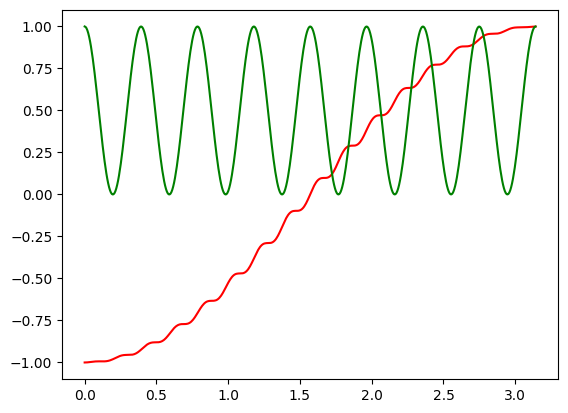

In [ ]:
############ Step 1: Main Evolution ############

times=np.linspace(0,np.pi,500)

result = mesolve(H,State,times,[],[Output1,Output2,Output3],options=options)

fig, bx=subplots()
bx.plot(times,(result.expect)[0],'r-')
bx.plot(times,(result.expect)[1],'g-')
#bx.plot(times,(result.expect)[2],'y-')

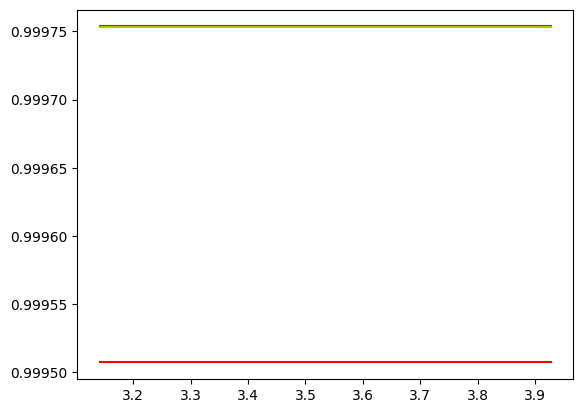

In [ ]:
############ Step 2: PHASE gate ############
H_step2 = tensor(identity(2),identity(2),sigmaz())

State = (result.states)[-1]
t_step2 = np.linspace(np.pi,np.pi*1.25,100)
result = mesolve(H_step2,State,t_step2,[],[Output1,Output2,Output3],options=options)

fig, bx=subplots()
bx.plot(t_step2,(result.expect)[0],'r-')
bx.plot(t_step2,(result.expect)[1],'g-')
bx.plot(t_step2,(result.expect)[2],'y-')

In [ ]:
######### Plotting-details #########
bx.axis([0,1.25*np.pi,-1.2,1.2])
bx.legend(["Output-Z", "Input Fidelity"],loc=8,framealpha=1.0)
print("Fidelity: ", (result.expect[2])[-1]) # Final fidelity with desired output-state is printed.
show()

Fidelity:  0.9997535877996204


## Phase Neuron

In [ ]:
######### Preliminaries #########
StateT = (tensor(basis(2,0),basis(2,1))+tensor(basis(2,1),basis(2,0))).unit() #Bell states are defined
StateS = (tensor(basis(2,0),basis(2,1))-tensor(basis(2,1),basis(2,0))).unit()
StateP=(tensor(basis(2,0),basis(2,0))+tensor(basis(2,1),basis(2,1))).unit()
StateM=(tensor(basis(2,0),basis(2,0))-tensor(basis(2,1),basis(2,1))).unit()

options=Options(store_states=True) # Option so that Qutip stores the states of the time-evolution.


StateIn=(StateT+0*StateS).unit() # Input state is defined for both the input-qubits and the full system.
State = tensor(StateIn,basis(2,0))

StateOut=(tensor(StateT,basis(2,0)) + 0*tensor(StateS,basis(2,1)) ).unit() # Desired output is defined

In [ ]:
#Output operators are defined:
Output1=StateIn*StateIn.dag() # Input state fidelity  (NB: partial trace is done explicitly here, see below).
Output4=StateOut*StateOut.dag() # Fidelity of state with respect to desired state
Output2=tensor(identity(2),identity(2),sigmax())  # X-component of output
Output3=-tensor(identity(2),identity(2),sigmaz()) # Z-component of output

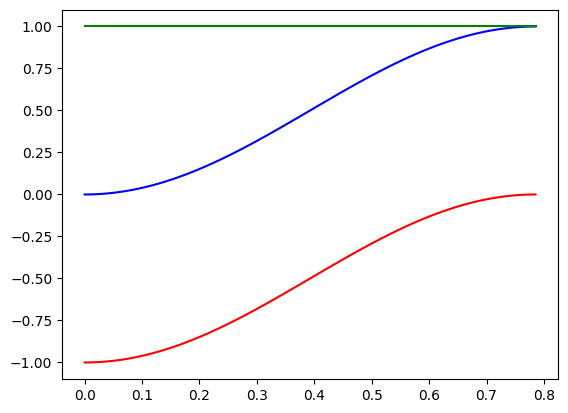

In [ ]:
# Timestep 0: Hadamard on output qubit ###

H_step0 = (2/np.sqrt(2))*tensor(identity(2),identity(2),sigmax())+(2/np.sqrt(2))*tensor(identity(2),identity(2),sigmaz())

t_step0 = np.linspace(0.0,np.pi*0.25,100)
result = mesolve(H_step0,State,t_step0,[],[Output2,Output3],options=options)

Input_Fid=[]
for i in range(0,len(result.states)):
    Input_Fid.append(expect(Output1,(result.states[i]).ptrace([0,1])))

fig, ax=subplots()
ax.plot(t_step0,(result.expect)[0],'b-')
ax.plot(t_step0,(result.expect)[1],'r-')
ax.plot(t_step0,Input_Fid,'g-')

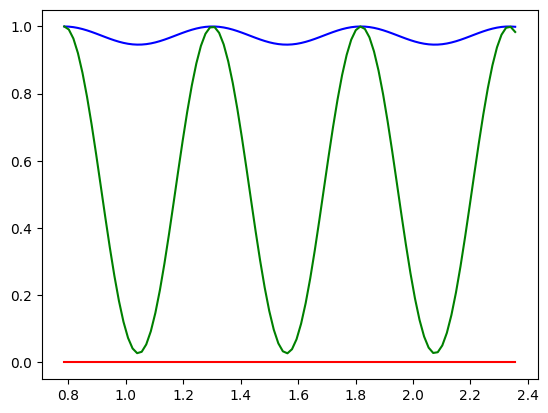

In [ ]:
### Timestep 1: Main Dynamics for detection of phase ###
m = 3
n = 82
J=2*n
delta=2*m

Sign = tensor(sigmap(),sigmam()) + tensor(sigmam(),sigmap())
H_step1 = J*(2*tensor(Sign,identity(2))+tensor(sigmaz(),sigmaz(),identity(2)))+delta*tensor(identity(2),sigmax(),sigmax())+tensor(identity(2),identity(2),sigmaz())

State = (result.states)[-1]
t_step1 = np.linspace(np.pi*0.25,np.pi*0.75,100)
result = mesolve(H_step1,State,t_step1,[],[Output2,Output3],options=options)

Input_Fid=[]
for i in range(0,len(result.states)):
    Input_Fid.append(expect(Output1,(result.states[i]).ptrace([0,1])))

fig, ax=subplots()
ax.plot(t_step1,(result.expect)[0],'b-')
ax.plot(t_step1,(result.expect)[1],'r-')
ax.plot(t_step1,Input_Fid,'g-')


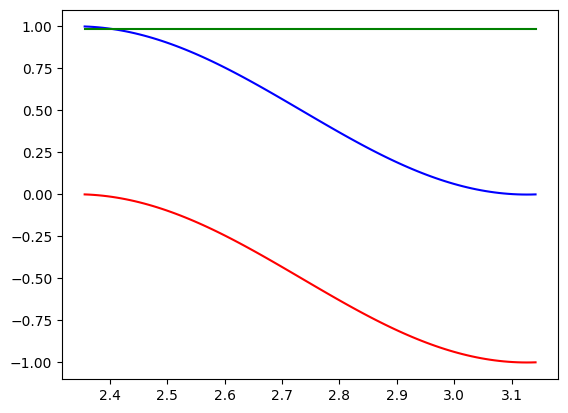

In [ ]:
### Timestep 2: Hadamard on output qubit ###

State = (result.states)[-1]
t_step2 = np.linspace(np.pi*0.75,np.pi,100)
result = mesolve(H_step0,State,t_step2,[],[Output2,Output3],options=options)

Input_Fid=[]
for i in range(0,len(result.states)):
    Input_Fid.append(expect(Output1,(result.states[i]).ptrace([0,1])))

fig, ax=subplots()
ax.plot(t_step2,(result.expect)[0],'b-')
ax.plot(t_step2,(result.expect)[1],'r-')
ax.plot(t_step2,Input_Fid,'g-')

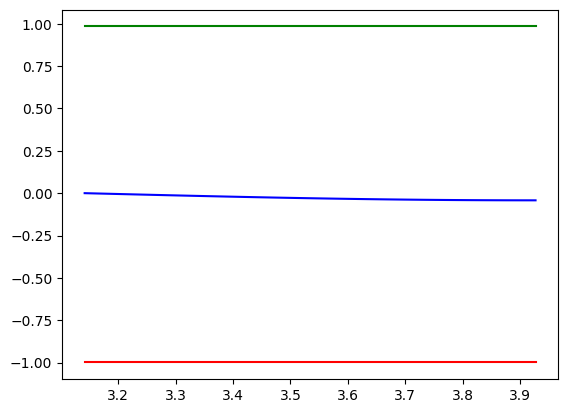

In [ ]:
### Timestep 3: CPhase gate ###
H_step3 = ((-1)**m)*tensor(identity(2),identity(2),sigmaz())

State = (result.states)[-1]
t_step3 = np.linspace(np.pi,np.pi*1.25,100)
result = mesolve(H_step3,State,t_step3,[],[Output2,Output3,Output4],options=options)

Input_Fid=[]
for i in range(0,len(result.states)):
    Input_Fid.append(expect(Output1,(result.states[i]).ptrace([0,1])))

fig, ax=subplots()
ax.plot(t_step3,(result.expect)[0],'b-')
ax.plot(t_step3,(result.expect)[1],'r-')
ax.plot(t_step3,Input_Fid,'g-')
#ax.plot(t_step3,(result.expect)[2],'y-')

In [ ]:
### Plotting Details ###
ax.legend(["Output-X", "Output-Z","Input Fidelity"],loc=3)
print("Fidelity: ", (result.expect)[2][-1]) # Final fidelity with desired output-state is printed.
show()

Fidelity:  0.9831832023860583
